## testing and evaluation between different prediction models for choosing best option for model export

In [36]:
import pandas as pd

df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing_cleaned.csv", index_col=0)

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698
4,25.87,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       925 non-null    float64
 1   Time_of_Day            925 non-null    object 
 2   Day_of_Week            925 non-null    object 
 3   Passenger_Count        925 non-null    float64
 4   Traffic_Conditions     925 non-null    object 
 5   Weather                925 non-null    object 
 6   Base_Fare              925 non-null    float64
 7   Per_Km_Rate            925 non-null    float64
 8   Per_Minute_Rate        925 non-null    float64
 9   Trip_Duration_Minutes  925 non-null    float64
 10  Trip_Price             925 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.7+ KB


In [38]:
df["Weather"].value_counts() # Clear, Rain, Snow
df["Traffic_Conditions"].value_counts() # Low, Medium, High
df["Time_of_Day"].value_counts() # Morning, Afternoon, Evening, Night
df["Day_of_Week"].value_counts() # Weekend, Weekday

Day_of_Week
Weekday    647
Weekend    278
Name: count, dtype: int64

## testing and encoding object typed columns

In [39]:
test_df = df.copy()

# one-hot encoding for non numeric columns
test_df = pd.get_dummies(test_df, drop_first=True)

test_df.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624,False,True,False,False,True,False,False,False
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032,True,False,False,True,False,False,False,False
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698,True,False,False,False,True,False,False,False
4,25.87,3.0,2.93,0.63,0.32,22.64,15.6180,True,False,False,False,False,False,False,False
5,8.64,2.0,2.55,1.71,0.48,89.33,60.2028,False,False,False,True,False,True,False,False


<Axes: >

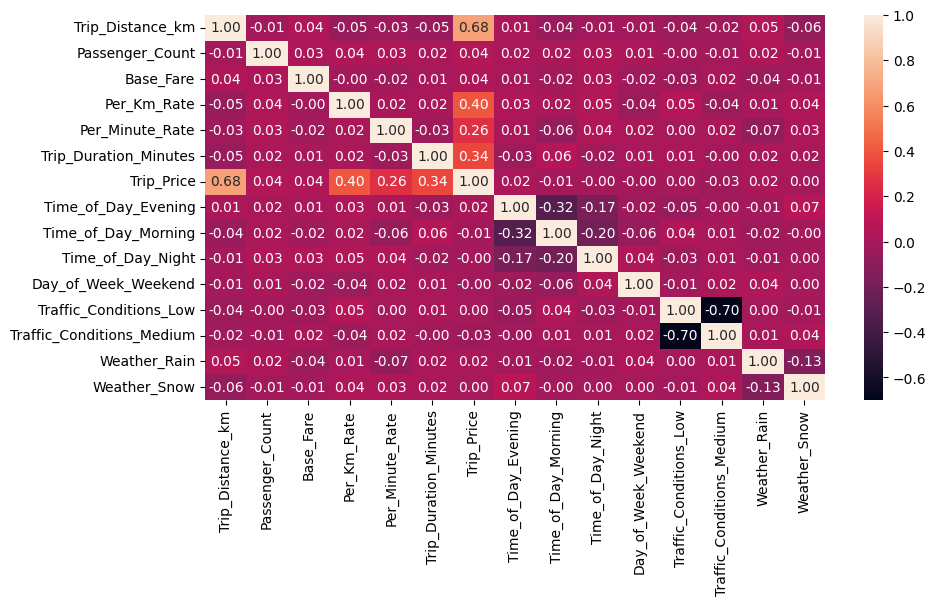

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)

sns.heatmap(test_df.corr(), annot=True, fmt=".2f")

keep object columns or not?

## train|val|test split

In [41]:
X, y = test_df.drop(columns="Trip_Price"), df["Trip_Price"]
test_df.shape, X.shape, y.shape

((925, 15), (925, 14), (925,))

In [42]:
X.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.35,3.0,3.56,0.80,0.32,53.82,False,True,False,False,True,False,False,False
2,36.87,1.0,2.70,1.21,0.15,37.27,True,False,False,True,False,False,False,False
3,30.33,4.0,3.48,0.51,0.15,116.81,True,False,False,False,True,False,False,False
4,25.87,3.0,2.93,0.63,0.32,22.64,True,False,False,False,False,False,False,False
5,8.64,2.0,2.55,1.71,0.48,89.33,False,False,False,True,False,True,False,False


In [43]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full,y_train_full,test_size=0.11, random_state=42)

X_train_full.shape, X_train.shape, X_val.shape, X_test.shape

((832, 14), (740, 14), (92, 14), (93, 14))

## scale data

In [52]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,925.0,24.996541,13.949063,1.2300,12.860,25.870000,36.870,49.9900
Passenger_Count,925.0,2.462703,1.075083,1.0000,2.000,2.000000,3.000,4.0000
Base_Fare,925.0,3.494876,0.844581,2.0100,2.760,3.510000,4.170,5.0000
Per_Km_Rate,925.0,1.223921,0.417138,0.5000,0.870,1.229934,1.560,2.0000
Per_Minute_Rate,925.0,0.293622,0.112698,0.1000,0.200,0.290000,0.390,0.5000
Trip_Duration_Minutes,925.0,61.794195,31.609215,5.0100,36.560,62.044144,87.740,119.8400
Trip_Price,925.0,51.690386,23.376955,6.1269,33.344,48.449600,66.581,118.0321


#### check 

In [ ]:
cols = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate','Per_Minute_Rate', 'Trip_Duration_Minutes']

result = []
for col in cols:
    test_df[col]
    min_val = test_df[col].min()
    max_val = test_df[col].max()
    mean_val = test_df[col].mean()
    
    mid_point = (min_val + max_val) / 2
    diff = mean_val - mid_point
    
    col_diff = {
        "column": col,
        "diff": diff
    }
    
    result.append(col_diff)
    
diff_df = pd.DataFrame(result)
diff_df

,column,diff
0,Trip_Distance_km,-0.613459
1,Passenger_Count,-0.037297
2,Base_Fare,-0.010124
3,Per_Km_Rate,-0.026079
4,Per_Minute_Rate,-0.006378
5,Trip_Duration_Minutes,-0.630805


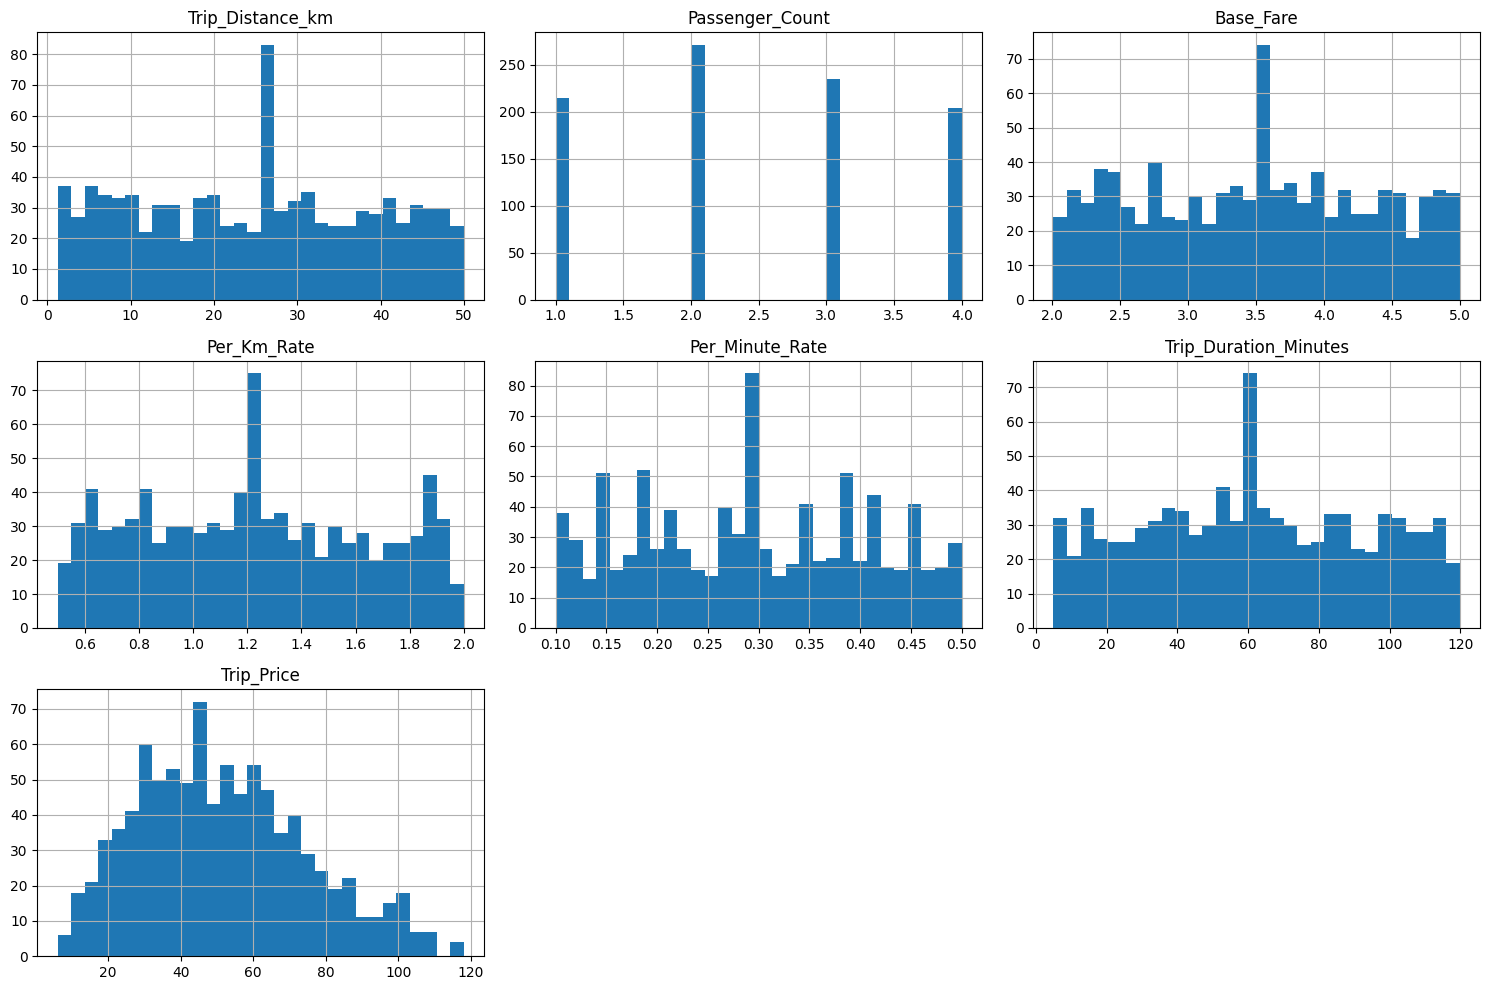

In [54]:
test_df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

<Axes: ylabel='Density'>

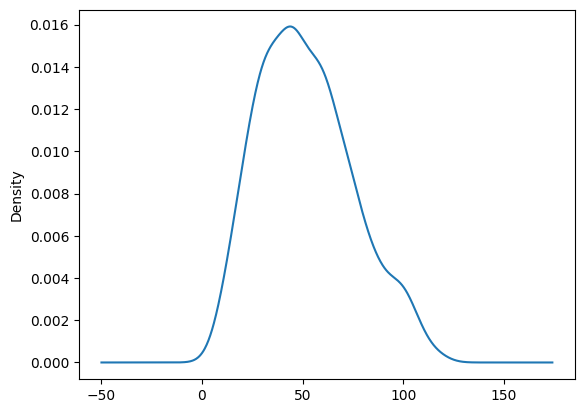

In [44]:
test_df["Trip_Price"].plot(kind="kde")

In [45]:
test_df.describe().drop("count").T

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,24.996541,13.949063,1.2300,12.860,25.870000,36.870,49.9900
Passenger_Count,2.462703,1.075083,1.0000,2.000,2.000000,3.000,4.0000
Base_Fare,3.494876,0.844581,2.0100,2.760,3.510000,4.170,5.0000
Per_Km_Rate,1.223921,0.417138,0.5000,0.870,1.229934,1.560,2.0000
Per_Minute_Rate,0.293622,0.112698,0.1000,0.200,0.290000,0.390,0.5000
Trip_Duration_Minutes,61.794195,31.609215,5.0100,36.560,62.044144,87.740,119.8400
Trip_Price,51.690386,23.376955,6.1269,33.344,48.449600,66.581,118.0321


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_val = scaler.transform(X_val)

print(f"{scaled_X_train.max()=:.3f}")
print(f"{scaled_X_train.min()=:.3f}")
print(f"{scaled_X_train.std()=:.3f}\n")
print(f"{scaled_X_test.max()=:.3f}")
print(f"{scaled_X_test.min()=:.3f}")
print(f"{scaled_X_test.std()=:.3f}\n")
print(f"{scaled_X_val.max()=:.3f}")
print(f"{scaled_X_val.min()=:.3f}")
print(f"{scaled_X_val.std()=:.3f}")

scaled_X_train.max()=3.884
scaled_X_train.min()=-1.852
scaled_X_train.std()=1.000

scaled_X_test.max()=3.884
scaled_X_test.min()=-1.797
scaled_X_test.std()=1.007

scaled_X_val.max()=3.884
scaled_X_val.min()=-1.851
scaled_X_val.std()=0.996


## find best k for knn model

10

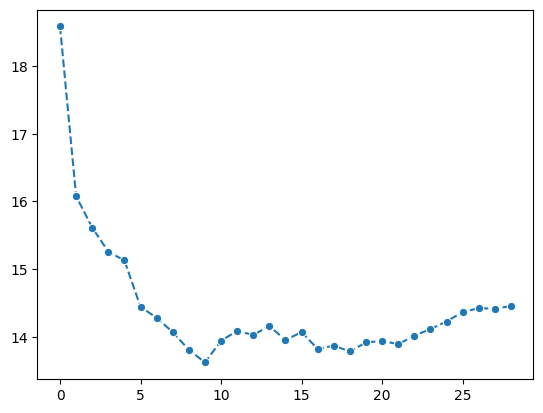

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
import seaborn as sns

error_list = []
for k in range(1,30):
    test_model = KNeighborsRegressor(n_neighbors=k)
    test_model.fit(scaled_X_train, y_train)
    y_pred = test_model.predict(scaled_X_val)
    error = root_mean_squared_error(y_val, y_pred)
    error_list.append(error)

sns.lineplot(error_list, marker="o", linestyle="--")

best_index = min(error_list)
best_k = error_list.index(best_index)+1
best_k

## compare and evaluate different models with scaled data from StandardScaler  

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(n_neighbors=best_k),
    "XGBoost": XGBRegressor(),
    "RidgeCV": RidgeCV(),
    "ElasticNet": ElasticNetCV()
}

result = []
for key, model in models.items():
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_val)
    
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    
    result.append({
        "model": key,
        "mae": mae,
        "mse": mse,
        "rmse": rmse
    })

result_df = pd.DataFrame(result)
result_df.sort_values(by="rmse")

,model,mae,mse,rmse
1,RandomForest,4.141076,32.183396,5.673041
3,XGBoost,4.582116,35.232818,5.935724
5,ElasticNet,6.093574,70.188070,8.377832
4,RidgeCV,6.092759,70.672394,8.406687
0,LinearRegression,6.091813,70.714272,8.409178
2,KNN,11.184301,185.557909,13.621964


#### test with MinMaxScaler to see if anything changes

In [49]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(X_train)

# scaled_X_train = scaler.transform(X_train)
# scaled_X_test = scaler.transform(X_test)
# scaled_X_val = scaler.transform(X_val)

# error_list = []
# for k in range(1,30):
#     test_model = KNeighborsRegressor(n_neighbors=k)
#     test_model.fit(scaled_X_train, y_train)
#     y_pred = test_model.predict(scaled_X_val)
#     error = root_mean_squared_error(y_val, y_pred)
#     error_list.append(error)

# best_index = min(error_list)
# best_k = error_list.index(best_index)+1

# models = {
#     "LinearRegression": LinearRegression(),
#     "RandomForest": RandomForestRegressor(),
#     "KNN": KNeighborsRegressor(n_neighbors=best_k),
#     "XGBoost": XGBRegressor(),
#     "RidgeCV": RidgeCV(),
#     "ElasticNet": ElasticNetCV()
# }

# result = []
# for key, model in models.items():
#     model.fit(scaled_X_train, y_train)
#     y_pred = model.predict(scaled_X_val)
    
#     mae = mean_absolute_error(y_val, y_pred)
#     mse = mean_squared_error(y_val, y_pred)
#     rmse = root_mean_squared_error(y_val, y_pred)
    
#     result.append({
#         "model": key,
#         "mae": mae,
#         "mse": mse,
#         "rmse": rmse
#     })

# result_df = pd.DataFrame(result)
# result_df

## RandomForestRegressor has best score in all 3 

#### StandardScaler is better for the majority of models

### test if there is diff with scaled and nonscaled data for RandomForest model

In [50]:
# forest = RandomForestRegressor()
# forest.fit(X_train, y_train)

# y_pred = forest.predict(X_val)

# mae = mean_absolute_error(y_val, y_pred)
# mse = mean_squared_error(y_val, y_pred)
# rmse = root_mean_squared_error(y_val, y_pred)

# mae, mse, rmse

#### better results with the scaled data

## test different parameters for randomforest